資料來源: https://www.kaggle.com/san-francisco/sf-salary-ranges-by-job-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# 資料敘述

In [2]:
salary_ranges = pd.read_csv("./data/salary-ranges-by-job-classification.csv")
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,0.0,0.0,330,0,C
1,COMMN,0110,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,15.0,15.0,323,0,D
2,COMMN,0111,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,25.0,25.0,323,0,D
3,COMMN,0112,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,50.0,50.0,323,0,D
4,COMMN,0114,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,100.0,100.0,323,0,M


In [3]:
#資料資訊觀察
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SetID               1356 non-null   object 
 1   Job Code            1356 non-null   object 
 2   Eff Date            1356 non-null   object 
 3   Sal End Date        1356 non-null   object 
 4   Salary SetID        1356 non-null   object 
 5   Sal Plan            1356 non-null   object 
 6   Grade               1356 non-null   object 
 7   Step                1356 non-null   int64  
 8   Biweekly High Rate  1356 non-null   float64
 9   Biweekly Low Rate   1356 non-null   float64
 10  Union Code          1356 non-null   int64  
 11  Extended Step       1356 non-null   int64  
 12  Pay Type            1356 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 95.4+ KB


In [4]:
#遺漏值觀察
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [5]:
#描述性統計，僅針對metric做統計
salary_ranges.describe()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3754.652006,392.676991,0.150442
std,1.045816,1481.002904,1605.157054,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2607.000000,21.000000,0.000000
50%,1.000000,2856.500000,3465.000000,351.000000,0.000000
75%,1.000000,3703.000000,4484.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


In [6]:
#特徵為Ratio:Biweekly High Rate與Nominal:Grade
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [7]:
#data type轉換
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

In [8]:
salary_ranges.info()
#共有1356筆資料，2行特徵

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Biweekly High Rate  1356 non-null   float64
 1   Grade               1356 non-null   object 
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


# 尺度分析

##### Metric
- Nominal:
按照「名稱」做分類


- Ordinal:
可以「計數」，可以做「排序」與「比較」。但是數值之間的計算是沒有意義的。

##### Non-metric
- Interval:
數值可以做排序跟比較外，還可以做「加減」。
可以計算「算術平均數」及「標準差」。

- Ratio:
有「絕對零點」，除了加減運算外，還可以「乘除」。

## Nominal

In [9]:
#計數
salary_ranges['Grade'].value_counts().head()
# 00000為眾數

00000    61
07450    12
07420     9
07170     9
06870     9
Name: Grade, dtype: int64

<AxesSubplot:>

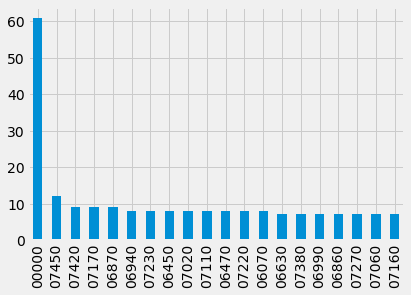

In [10]:
#繪製長條圖
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:ylabel='Grade'>

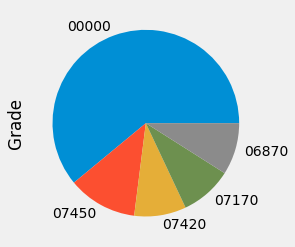

In [11]:
#繪製圓餅圖
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')